In [31]:
from epyr.state import State
from epyr.circuit import Circuit

from qiskit import QuantumCircuit, Aer
backend = Aer.get_backend("statevector_simulator")

import timeit
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
def n_qubit_entanglement_circuit(N):
    c = Circuit(N)
    c.h(0)
    for i in range(1, N):
        c.cnot(0, i)
    return c

In [30]:
def n_qubit_entanglement_circuit_qiskit(N):
    c = QuantumCircuit(N)
    c.h(0)
    for i in range(1, N):
        c.cnot(0, i)
    return c

In [32]:
def time_compute(c, N):
    s = State(N)
    c.compute(s)

def time_compute_qiskit(cq):
    job = backend.run(cq)

N_MAX = 20
times, times_qiskit = [], []
for N in range(1, N_MAX):
    # Setup the circuit
    c = n_qubit_entanglement_circuit(N)
    cq = n_qubit_entanglement_circuit_qiskit(N)
    times.append(timeit.timeit(lambda: time_compute(c, N), number=1))
    times_qiskit.append(timeit.timeit(lambda: time_compute_qiskit(cq), number=1))

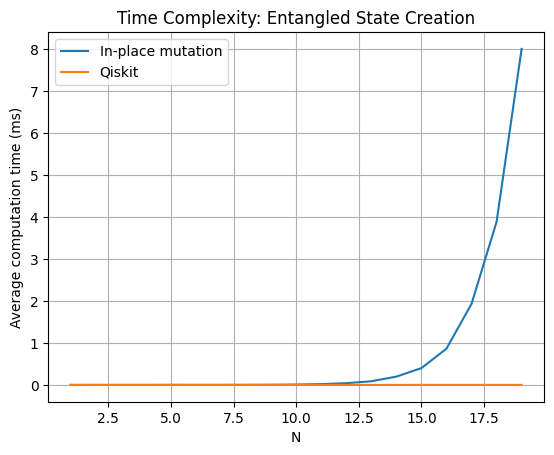

In [33]:
plt.plot(range(1, N_MAX), times, label="In-place mutation")
plt.plot(range(1, N_MAX), times_qiskit, label="Qiskit")
plt.title("Time Complexity: Entangled State Creation")
plt.xlabel("N")
plt.ylabel("Average computation time (ms)")
plt.legend()
plt.grid()

In [26]:
# Sanity check
c = Circuit(20)
s = State(20)

c.h(0)
for i in range(1, 20):
    c.cnot(0, i)

c.compute(s)